<a href="https://colab.research.google.com/github/chosunghyun18/kaggle/blob/master/titanic_tutorial_for_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# test colab
print("Hello worlrd")

Hello worlrd


In [2]:
# header
#데이터 처리
import numpy as np
import pandas as pd

#시각화
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns 
plt.style.use('seaborn-whitegrid')
import missingno

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
#서포트 백터 머신;/
from xgboost import XGBClassifier  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

import sys
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import  drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls

drive  sample_data


In [5]:
test = pd.read_csv('/content/drive/My Drive/Titanic_data/test.csv')
train = pd.read_csv('/content/drive/My Drive/Titanic_data/train.csv')

In [6]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.shape #  column : 891

(891, 12)

In [9]:
#ready for merges file 
ntrain= train.shape[0]   #train.shape[0] = 891, train.shape[1] =  12
ntest= test.shape[0]     #test.shape[0] = 418, test.shape[1] = 11
y_train = train['Survived'].values
passId = test['PassengerId']


data = pd.concat((train,test))

print("data size is :{}".format(data.shape))

data size is :(1309, 12)


In [10]:
ntrain

891

In [11]:
ntest

418

In [12]:
passId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

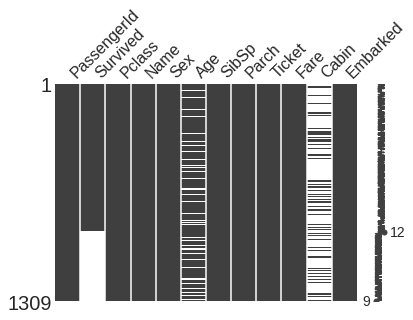

In [13]:
missingno.matrix(data,figsize=(6,4))

In [14]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [15]:
data.isna().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

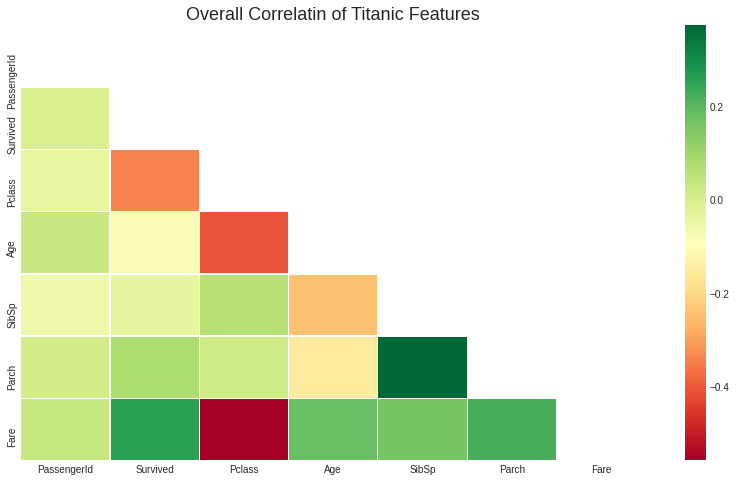

In [17]:
#co-relation matrix
corr= data.corr() 
mask=np.zeros_like(corr, dtype=np.bool)   # return an arrary of zeros with the same shape and type

mask[np.triu_indices_from(mask)]=True      # Return the indices for the upper-triangle of an (n, m) array. 

plt.figure(figsize=(14,8))
plt.title('Overall Correlatin of Titanic Features', fontsize=18)

#집계한 값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화하는 히트맵(Heatmap)        
sns.heatmap(corr, mask=mask,annot=False ,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})


plt.show()

In [18]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0    549
1    342
Name: Survived, dtype: int64


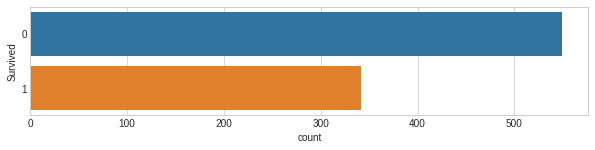

In [19]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived',data = train)

#print(train.Survived.value_conts) 만 써도 그래프는 나옴 but d

print(train.Survived.value_counts())

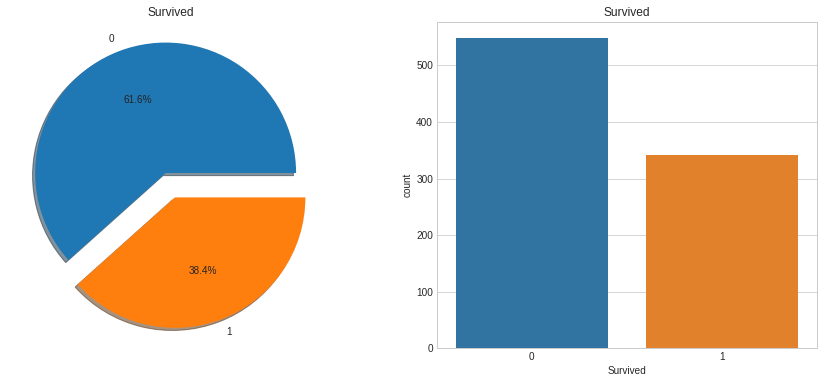

In [20]:
#pie graph
def piecount(col):
    f, ax = plt.subplots(1,2,figsize=(15,6)) #horizantl 15 width 6
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())],autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(col) 
    ax[0].set_ylabel('')
    sns.countplot(col,data=train,ax=ax[1])
    ax[1].set_title(col)
    plt.show()

piecount('Survived')

In [21]:
 #pclass analysis
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [22]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


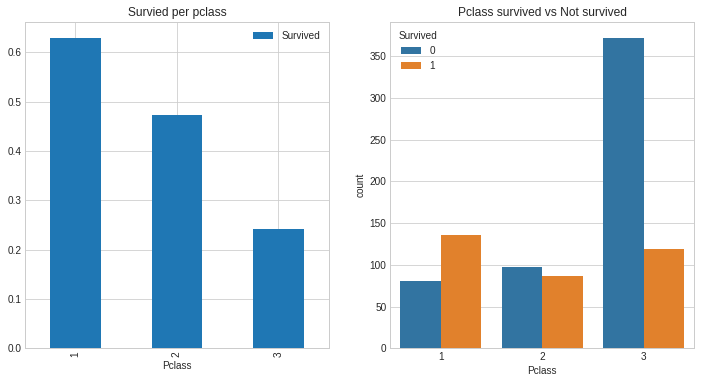

In [23]:
f , ax = plt.subplots(1,2,figsize=(12,6))

ax[0].set_title('Survied per pclass')
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])

ax[1].set_title('Pclass survived vs Not survived')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])

plt.show()

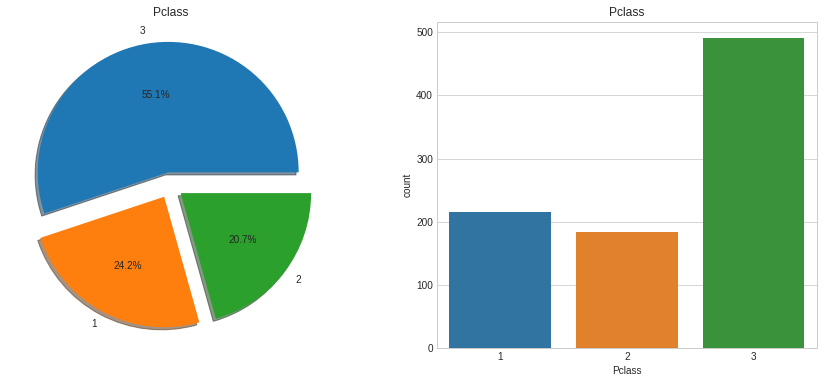

In [24]:
piecount('Pclass')

In [25]:
#NAME analysis
data.Name.value_counts()

Kelly, Mr. James                                               2
Connolly, Miss. Kate                                           2
Andersen-Jensen, Miss. Carla Christine Nielsine                1
Straus, Mr. Isidor                                             1
Artagaveytia, Mr. Ramon                                        1
                                                              ..
Nasser, Mr. Nicholas                                           1
Andersson, Mr. August Edvard ("Wennerstrom")                   1
Allison, Master. Hudson Trevor                                 1
Backstrom, Mr. Karl Alfred                                     1
Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdick)    1
Name: Name, Length: 1307, dtype: int64

In [26]:
#copy data
temp = data.copy()
temp['Initial'] = 0 # make Initial
temp['Initial'] = data.Name.str.extract('([A-Za-z0-9]+)\.')

In [27]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Mlle          2
Major         2
Countess      1
Mme           1
Lady          1
Sir           1
Jonkheer      1
Capt          1
Don           1
Dona          1
Name: Initial, dtype: int64

In [28]:
pd.crosstab(temp.Initial,temp.Sex).T.style.background_gradient(cmap='summer_r')#Capital T standsfor transfer matrix

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [29]:
#survived percentage function
def survpct(col):
  return temp.groupby(col)['Survived'].mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [30]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [31]:
temp.loc[temp['Initial']=='Dona'] #Dona age = 39

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


In [32]:
temp.loc[temp['Initial']=='Dona','Initial']='Mrs'

In [33]:
pd.crosstab(temp.Initial,temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [34]:
#change LastName to number
temp['NumName']=temp['LastName'].factorize()[0]

In [35]:
pd.crosstab(temp.NumName,temp.Survived).T.style.background_gradient(cmap='summer_r')

In [36]:
temp.loc[temp['NumName']==8] #check Lastname 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Johnson,8
172,173,1.0,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,Miss,Johnson,8
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,Mr,Johnson,8
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S,Mr,Johnson,8
719,720,0.0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S,Mr,Johnson,8
869,870,1.0,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,Master,Johnson,8


In [37]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


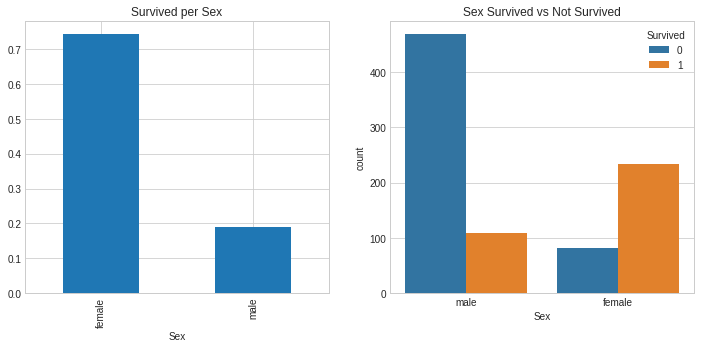

In [38]:
def bag(col,target,title,title1):
  f,ax=plt.subplots(1,2,figsize = (12,5))
  train.groupby([col])[target].mean().plot(kind = 'bar',ax = ax[0])
  ax[0].set_title(title)
  #secound bar chart for sex and survived 
  sns.countplot(col,hue=target,data = train,ax= ax[1])
  ax[1].set_title(title1)
  plt.show()



bag("Sex","Survived","Survived per Sex","Sex Survived vs Not Survived")
# In the ship we can found out there are more man than woman
# however girls survived ratio is triple than guys suvived ratio




In [39]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [40]:
#analysis age data
print('Oldest Passenger wsa',data['Age'].max(),'years')
print('Youngest Passenger was',data['Age'].min(),'Years')
print('Average Age on the ship  was',int(data['Age'].mean()),'Years')

Oldest Passenger wsa 80.0 years
Youngest Passenger was 0.17 Years
Average Age on the ship  was 29 Years


In [41]:
import math
 
print(math.ceil(0.5))
print(math.ceil(0.5))


print(max([1,2,3]))
print(max(['Chevrolet']))

print(min([1,2,3]))
print(min(['Chevrolet']))

from statistics import mean

a=[5,2,3,2]


avg = mean(a)


print(avg)

1
1
3
Chevrolet
1
Chevrolet
3


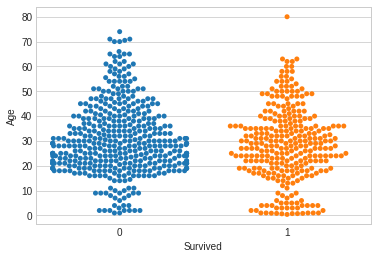

<Figure size 432x288 with 0 Axes>

In [42]:
sns.swarmplot( x=train['Survived'],y = train['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()
plt.savefig("swarm_plot.pdf")

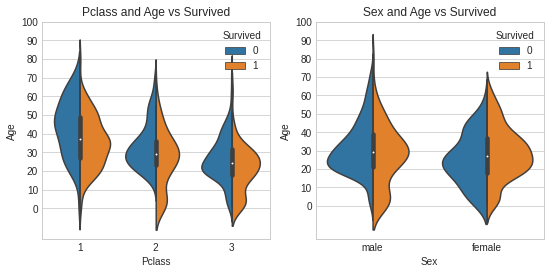

In [51]:
f , ax = plt.subplots(1,2,figsize=(9,4))
sns.violinplot("Pclass","Age",hue =  "Survived",data= train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue =  "Survived",data= train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


In [54]:
temp.groupby('Initial').agg({'Age':['mean','count']}).T

Initial    Capt   Col  Countess   Don  ...         Mrs    Ms    Rev   Sir
Age mean   70.0  54.0      33.0  40.0  ...   37.005848  28.0  41.25  49.0
    count   1.0   4.0       1.0   1.0  ...  198.000000   2.0   8.00   1.0

[2 rows x 17 columns]

In [44]:
temp = temp.reset_index(drop=True)

temp['Age'] = temp.groupby("Initial")['Age'].apply(lambda x: x.fillna(x.mean()))

temp[31:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.005848,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,30
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,Miss,Glynn,31
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,NaN,S,Mr,Wheadon,32
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,Mr,Meyer,33
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,Mr,Holverson,34
36,37,1.0,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,Mr,Mamee,35
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,NaN,S,Mr,Cann,36
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,Miss,Vander,18
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,Miss,Nicola,37
40,41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,NaN,S,Mrs,Ahlin,38


In [45]:
a = 2
b = 2
print( a**b)

def sample(a,b):
    print(a**b)
sample(2,2)

4
4


In [46]:
a = lambda x,y : x**y
print(a(2,2))
def sample(x,y,z):
    n = x+y+z
    print(n)

sample(1,2,3)

sample2 = lambda x,y,z : x*y*z
print(sample2(1,2,3))


z = (lambda x, y : x+y)(10,20)
print(z)

4
6
6
30


In [47]:
#lambda 식으로 짤 경우 상당히 코드가 단순해진다. 짝 홀 수 분류기
for num in range(1,3):  
 if num % 2 == 0 :
   print(num)
   continue
 if num %2 ==1:
   print(num)
   continue

print((lambda x, y :x if x %2 ==0 else y )(1,2))
print((lambda x, y :x if x %2 ==1 else y )(1,2))

1
2
2
1


SyntaxError: ignored